In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','diabetes']
data=pd.read_csv('/Users/ranjitsah/Downloads/clean_data.csv',header=0,names=col_names)

In [210]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


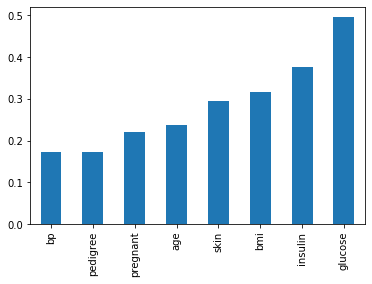

In [211]:
data.corr()['diabetes'][:-1].sort_values(ascending=True).plot(kind='bar')

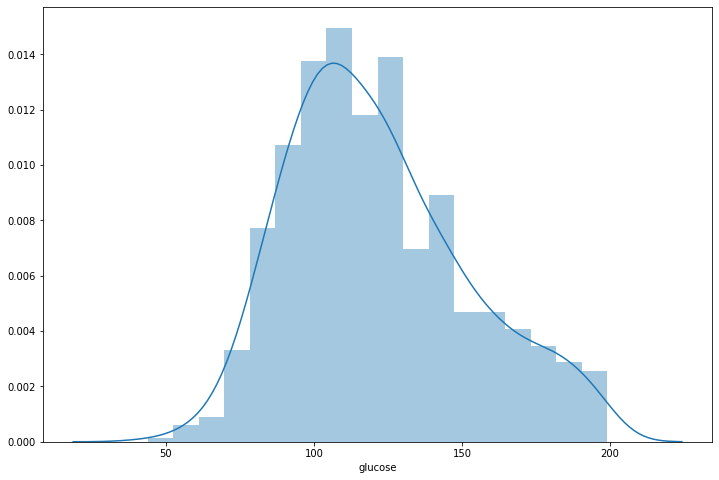

In [212]:
plt.figure(figsize=(12,8))
sns.distplot(data['glucose'])

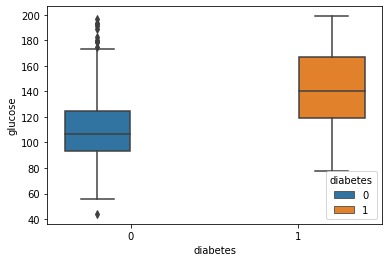

In [213]:
sns.boxplot( x='diabetes',
    y='glucose',
    hue='diabetes',
    data=data,)

In [214]:
#split dataset in features and target variable
X=data.drop('diabetes',axis=1).values
y=data['diabetes'].values

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [218]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [219]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [220]:
X_train.shape

(537, 8)

In [221]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [222]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
17/17 [==============================] - 0s 8ms/step - loss: 0.7043 - val_loss: 0.6943
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6914 - val_loss: 0.6901
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6891 - val_loss: 0.6876
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6864 - val_loss: 0.6854
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6839 - val_loss: 0.6831
Epoch 6/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6814 - val_loss: 0.6806
Epoch 7/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6786 - val_loss: 0.6780
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6760 - val_loss: 0.6751
Epoch 9/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6731 - val_loss: 0.6722
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6696 - val_loss: 0.6683
Epoch 11/

In [224]:
losse = pd.DataFrame(model.history.history)

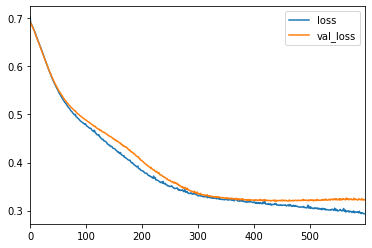

In [225]:
losse.plot()

In [228]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [226]:
from tensorflow.keras.callbacks import EarlyStopping

In [227]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=3)

In [229]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 0s 8ms/step - loss: 0.6895 - val_loss: 0.6850
Epoch 2/600
17/17 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6754
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6694 - val_loss: 0.6639
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6585 - val_loss: 0.6548
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6493 - val_loss: 0.6469
Epoch 6/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6407 - val_loss: 0.6397
Epoch 7/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6335 - val_loss: 0.6326
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6260 - val_loss: 0.6259
Epoch 9/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6187 - val_loss: 0.6194
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6117 - val_loss: 0.6126
Epoch 11/

In [230]:
model_loss = pd.DataFrame(model.history.history)

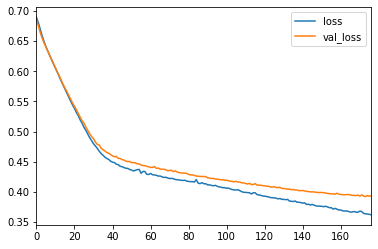

In [231]:
model_loss.plot()

In [232]:
from tensorflow.keras.layers import Dropout

In [240]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2,activation='relu'))
model.add(Dropout(0.2))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [241]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
17/17 [==============================] - 0s 8ms/step - loss: 0.6939 - val_loss: 0.6908
Epoch 2/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6907 - val_loss: 0.6887
Epoch 3/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6875 - val_loss: 0.6867
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6857 - val_loss: 0.6846
Epoch 5/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6836 - val_loss: 0.6828
Epoch 6/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6817 - val_loss: 0.6811
Epoch 7/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6803 - val_loss: 0.6793
Epoch 8/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6778 - val_loss: 0.6776
Epoch 9/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6766 - val_loss: 0.6760
Epoch 10/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6750 - val_loss: 0.6746
Epoch 11/

In [242]:
model_loss = pd.DataFrame(model.history.history)

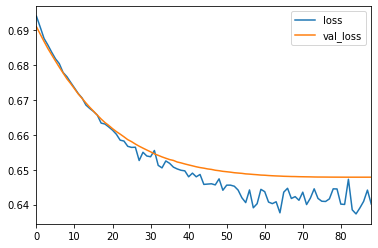

In [243]:
model_loss.plot()

In [244]:
from sklearn.metrics import classification_report,confusion_matrix

In [245]:
prediction=model.predict_classes(X_test)


In [246]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231

